<a href="https://colab.research.google.com/github/randy-ar/gcolab/blob/main/Explanatory_Data_Analysis_EPA_Chemical_Data_Reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import plotly.express as px

# Read Data CSV

In [69]:
table_consumer_cleaned = "1Tc_x6HKuURcpj3926fluGtwPyvofEc2Z"
table_consumer_one_hot_cleaned = "1UjcpFkWsDUijZVFiS1d6L2NO9GcLTMyR"
download_url = "https://docs.google.com/uc?export=download&id="

In [70]:
gdown.download(download_url+table_consumer_one_hot_cleaned, 'df_consumer.csv', quiet=False)

Downloading...
From: https://docs.google.com/uc?export=download&id=1UjcpFkWsDUijZVFiS1d6L2NO9GcLTMyR
To: /content/df_consumer.csv
100%|██████████| 9.88M/9.88M [00:00<00:00, 117MB/s]


'df_consumer.csv'

In [71]:
df_consumer = pd.read_csv('df_consumer.csv')

In [72]:
df_consumer.count()

,0
CHEMICAL ID,24441
CHEMICAL NAME,24441
CHEMICAL ID TYPE,24441
RECYCLED,24441
PHYSICAL FORM(S),24441
2019 DOMESTIC PV,24441
2019 IMPORT PV,24441
2019 PV,24441
2018 PV,24441
2017 PV,24441


# EDA

## Nomor 1

### Kepadatan production value pada setiap states

In [73]:
# prompt: i want Choropleth map describe sum 2019 PV in each state
df_state_pv_2019 = df_consumer.groupby('SITE STATE')['2019 PV'].sum().reset_index()

fig = px.choropleth(df_state_pv_2019,
                    locations='SITE STATE',
                    locationmode="USA-states",
                    color='2019 PV',
                    scope="usa",
                    color_continuous_scale="plasma",
                    title="Sum of PV in each state in 2019")
fig.show()

### Kepadatan pekerja yang terlibat dengan bahan kimia

In [74]:
# prompt: i want Choropleth map describe sum WORKERS in each city

# Aggregate WORKERS by City
df_city_workers = df_consumer.groupby('SITE CITY')['WORKERS MEDIAN'].sum().reset_index()
df_state_workers = df_consumer.groupby('SITE STATE')['WORKERS MEDIAN'].sum().reset_index()

fig = px.choropleth(df_state_workers,
                    locations='SITE STATE',
                    locationmode="USA-states",
                    color='WORKERS MEDIAN',
                    scope="usa",
                    color_continuous_scale="plasma",
                    title="Sum of Workers in each State")
fig.show()

## Nomor 2

### Bahan kimia yang tidak didaur ulang

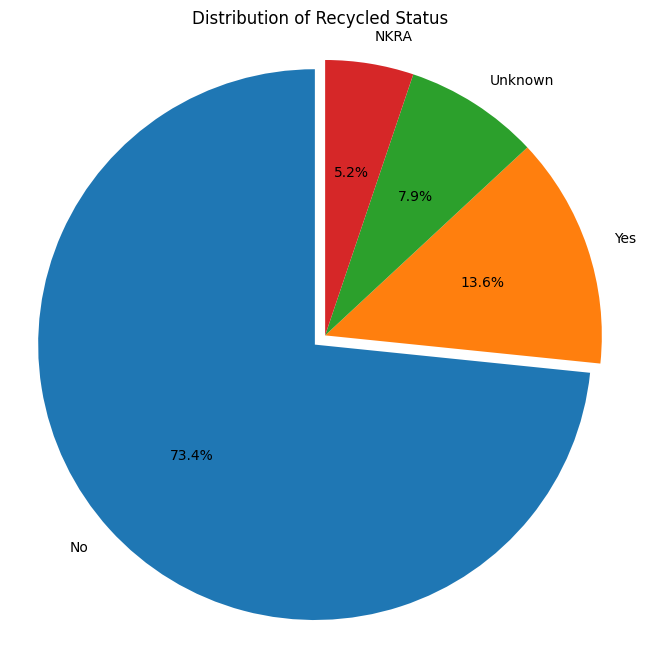

In [75]:
recycled_counts = df_consumer['RECYCLED'].value_counts()

labels = recycled_counts.index
sizes = recycled_counts.values
explode = [0.05 if label == 'No' else 0 for label in labels]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recycled Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Bahan Kimia yang terdaftar sebagai TSCA

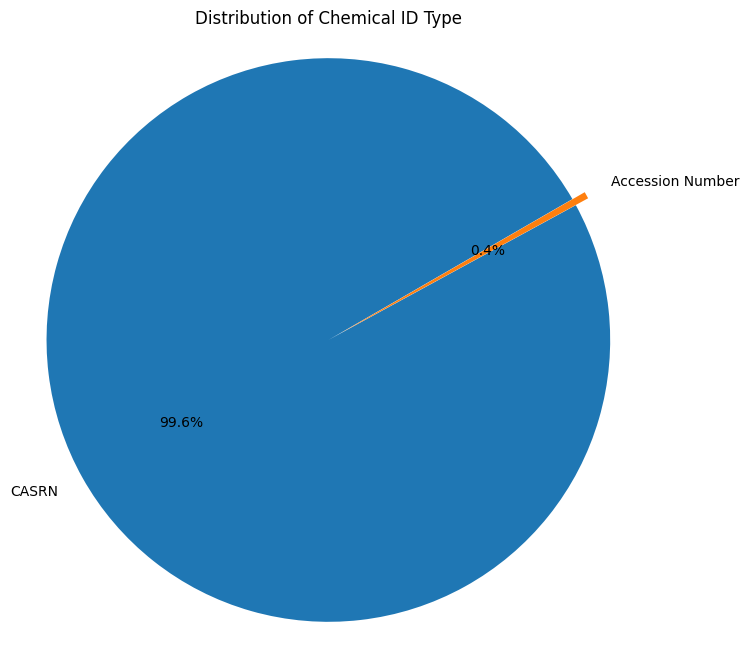

In [76]:
chemical_type_counts = df_consumer['CHEMICAL ID TYPE'].value_counts()

labels = chemical_type_counts.index
sizes = chemical_type_counts.values
explode = [0.05 if label == 'Accession Number' else 0 for label in labels]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=30)
plt.title('Distribution of Chemical ID Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

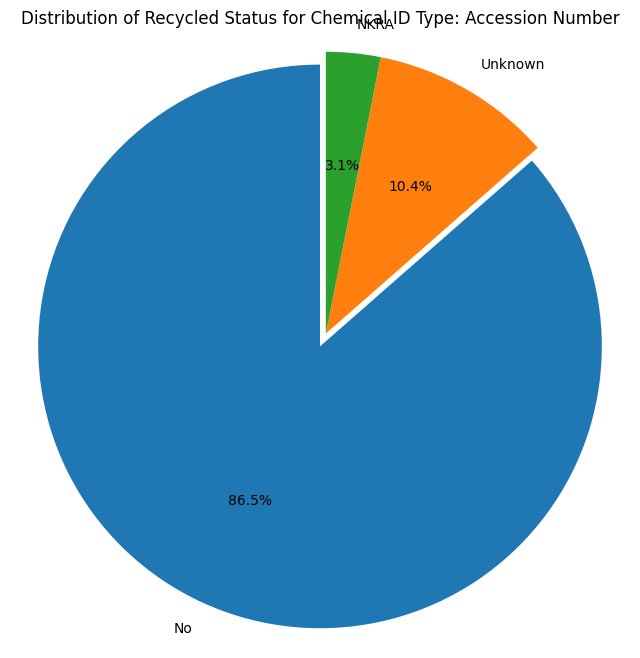

In [77]:
# prompt: show distribution recycled where chemical id type is Accession Number

import matplotlib.pyplot as plt
# Filter the dataframe where 'CHEMICAL ID TYPE' is 'Accession Number'
df_accession_number = df_consumer[df_consumer['CHEMICAL ID TYPE'] == 'Accession Number']

# Get the value counts for the 'RECYCLED' column in the filtered dataframe
recycled_accession_counts = df_accession_number['RECYCLED'].value_counts()

labels_accession = recycled_accession_counts.index
sizes_accession = recycled_accession_counts.values
explode_accession = [0.05 if label == 'No' else 0 for label in labels_accession]  # Explode 'No'

plt.figure(figsize=(8, 8))
plt.pie(sizes_accession, explode=explode_accession, labels=labels_accession, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recycled Status for Chemical ID Type: Accession Number')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### TOP Production Value yang tidak di daur ulang

In [78]:
df_consumer.columns

Index(['CHEMICAL ID', 'CHEMICAL NAME', 'CHEMICAL ID TYPE', 'RECYCLED',
       'PHYSICAL FORM(S)', '2019 DOMESTIC PV', '2019 IMPORT PV', '2019 PV',
       '2018 PV', '2017 PV', '2016 PV', 'SITE LATITUDE', 'SITE LONGITUDE',
       'SITE CITY', 'SITE COUNTY / PARISH', 'SITE STATE', 'SITE POSTAL CODE',
       'SITE NAICS CODE 1', 'SITE NAICS ACTIVITY 1', 'SITE NAICS CODE 2',
       'SITE NAICS ACTIVITY 2', 'SITE NAICS CODE 3', 'SITE NAICS ACTIVITY 3',
       'WORKERS CODE', 'WORKERS', 'WORKERS MEDIAN', 'CHEMICAL NAME SUMMARY',
       'SITE NAICS ID 1', 'GENERAL SECTOR NAME', 'GENERAL SECTOR ID',
       'SITE NAICS SECTOR 1', 'SITE NAICS NAME 1', 'PHYSICAL FORM DRY POWDER',
       'PHYSICAL FORM PELLETS OR LARGE CRYSTALS',
       'PHYSICAL FORM WATER OR SOLVENT WET SOLID', 'PHYSICAL FORM OTHER SOLID',
       'PHYSICAL FORM GAS OR VAPOR', 'PHYSICAL FORM LIQUID',
       'PHYSICAL FORM NKRA', 'CHEMICAL ID TYPE ACCESSION NUMBER',
       'CHEMICAL ID TYPE CASRN', 'RECYCLED NO', 'RECYCLED YES',
 

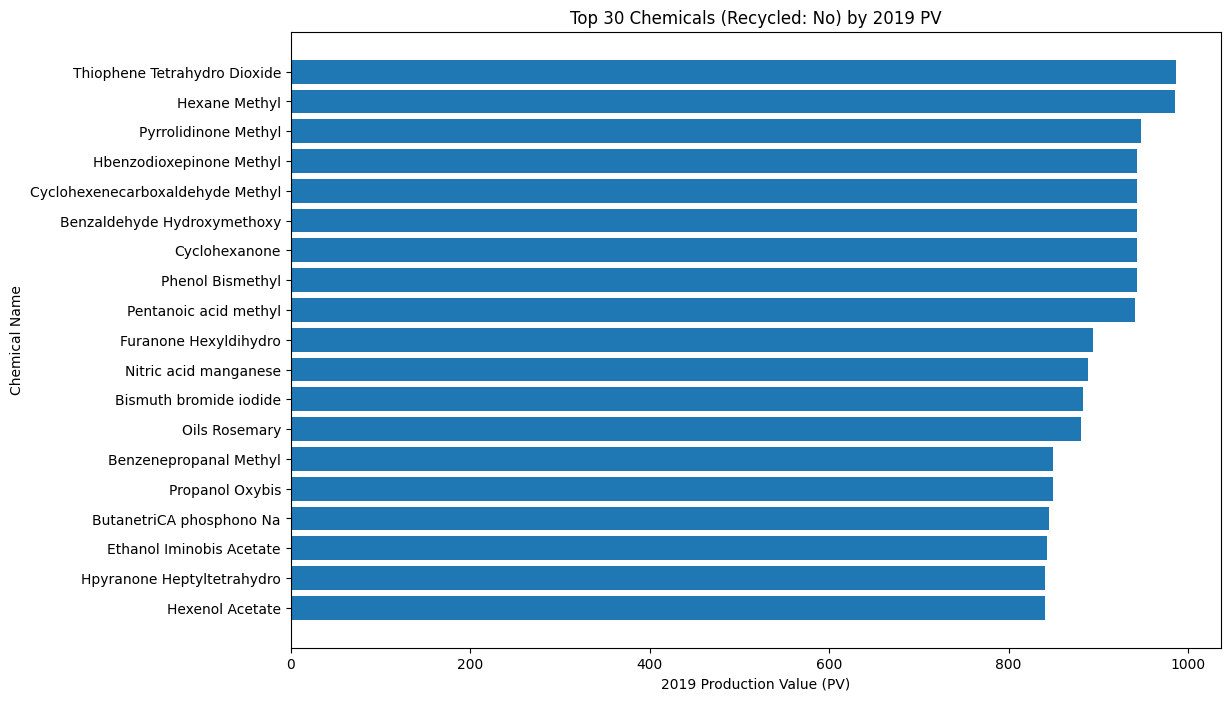

In [79]:
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df_consumer[df_consumer['RECYCLED NO'] == 1].copy()

# Get the top 10 rows based on '2019 PV'
df_top_10_pv_recycled_no = df_recycled_no.nlargest(20, '2019 PV')

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(df_top_10_pv_recycled_no['CHEMICAL NAME SUMMARY'], df_top_10_pv_recycled_no['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('Chemical Name')
plt.title('Top 30 Chemicals (Recycled: No) by 2019 PV')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top

# Change bar color to red if 'CHEMICAL ID TYPE' is 'Accession Number'
for i, row in df_top_10_pv_recycled_no.iterrows():
    if row['CHEMICAL ID TYPE'] == 'Accession Number':
        bars[df_top_10_pv_recycled_no.index.get_loc(i)].set_color('red')

plt.show()

### TOP Production Value yang tidak di daur ulang dibedakan oleh bentuk fisik bahan kimianya

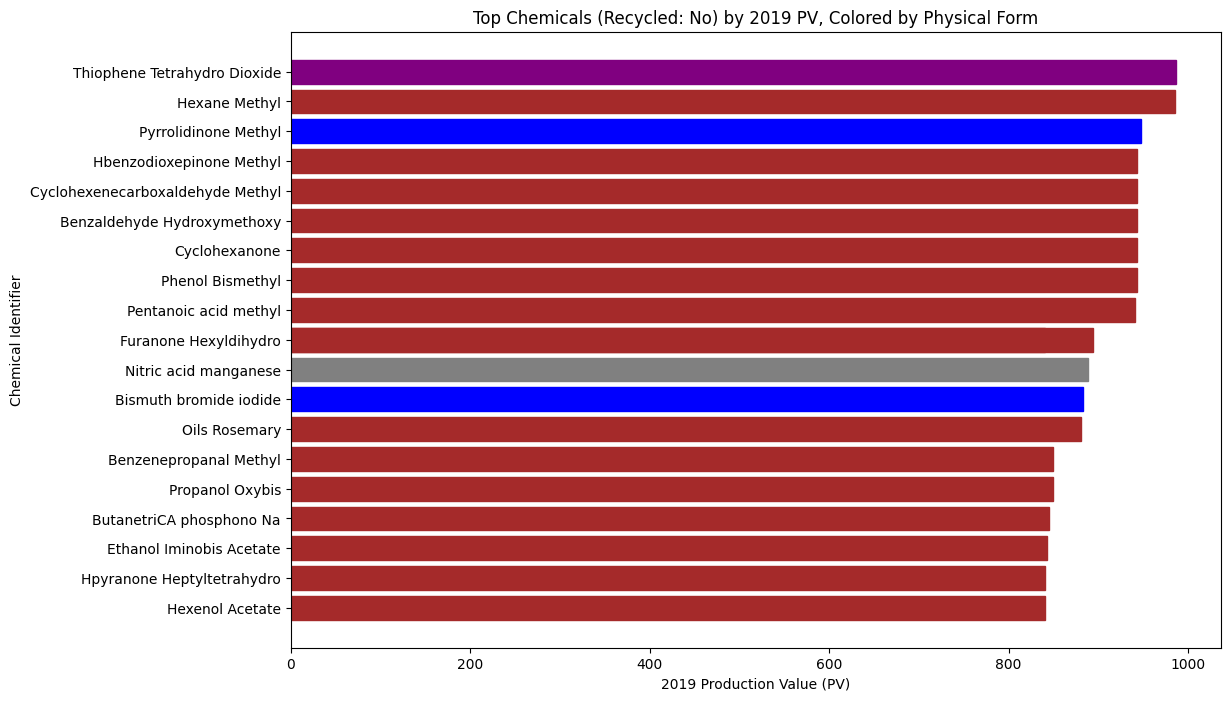

In [80]:
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df_consumer[df_consumer['RECYCLED NO'] == 1].copy()

# Get the top 10 rows based on '2019 PV'
df_top_10_pv_recycled_no = df_recycled_no.nlargest(20, '2019 PV')

# Define the physical form columns and their priority order
physical_form_cols = [
    'PHYSICAL FORM DRY POWDER',
    'PHYSICAL FORM PELLETS OR LARGE CRYSTALS',
    'PHYSICAL FORM WATER OR SOLVENT WET SOLID',
    'PHYSICAL FORM OTHER SOLID',
    'PHYSICAL FORM GAS OR VAPOR',
    'PHYSICAL FORM LIQUID',
    'PHYSICAL FORM NKRA'
]

# Define a color map for each physical form (adjust colors as needed)
color_map = {
    'PHYSICAL FORM DRY POWDER': 'blue',
    'PHYSICAL FORM PELLETS OR LARGE CRYSTALS': 'green',
    'PHYSICAL FORM WATER OR SOLVENT WET SOLID': 'orange',
    'PHYSICAL FORM OTHER SOLID': 'purple',
    'PHYSICAL FORM GAS OR VAPOR': 'red',
    'PHYSICAL FORM LIQUID': 'brown',
    'PHYSICAL FORM NKRA': 'gray'
}

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
# Use 'CHEMICAL NAME SUMMARY' for the y-axis labels if available, otherwise use 'CHEMICAL ID'
y_labels = df_top_10_pv_recycled_no['CHEMICAL NAME SUMMARY'] if 'CHEMICAL NAME SUMMARY' in df_top_10_pv_recycled_no.columns else df_top_10_pv_recycled_no['CHEMICAL ID']
bars = plt.barh(y_labels, df_top_10_pv_recycled_no['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('Chemical Identifier') # Update label as appropriate
plt.title('Top Chemicals (Recycled: No) by 2019 PV, Colored by Physical Form')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top

# Iterate through the bars and color them based on physical form
for i, row in df_top_10_pv_recycled_no.iterrows():
    bar_color = 'black' # Default color if no physical form is 'Yes'
    for form_col in physical_form_cols:
        if row[form_col] == 1:
            bar_color = color_map.get(form_col, 'black') # Get color from map, default to black
            break # Apply the color for the first 'Yes' and move to the next bar

    # Find the index of the current row in the plotted data to color the correct bar
    bar_index = df_top_10_pv_recycled_no.index.get_loc(i)
    bars[bar_index].set_color(bar_color)

# You might want to add a legend to explain the colors
# This can be a bit tricky with individual bar coloring, but you can manually create one
# using plt.scatter or similar. For simplicity, a text annotation or title explanation might suffice.

plt.show()

### TOP 10 States yang mempunyai bahan kimia beracun dan tidak di daur ulang

In [81]:
# prompt: find state that have most chemical id type = Accession Number and recycled = no, display it as horizontal chart x axis is count value

# Filter for 'Accession Number' and 'No' in 'RECYCLED'
df_accession_no_recycled = df_consumer[
    (df_consumer['CHEMICAL ID TYPE'] == 'Accession Number') &
    (df_consumer['RECYCLED'] == 'No')
]

# Count the occurrences of each state in the filtered data
state_counts = df_accession_no_recycled['SITE STATE'].value_counts().reset_index()
state_counts.columns = ['SITE STATE', 'Count']

# Sort the states by count in descending order and get the top one
most_common_state = state_counts.iloc[0]

# Create a horizontal bar chart for the states with the most counts
# For this example, we will show the top 10 states for better visualization
top_states = state_counts.head(10)

fig = px.bar(top_states,
             x='Count',
             y='SITE STATE',
             orientation='h',
             title='Top States with Most "Accession Number" and "Not Recycled" Chemicals')
fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Order bars by value
fig.show()

## Nomor 3

### TOP 10 Sector dengan konsumsi bahan kimia tertinggi

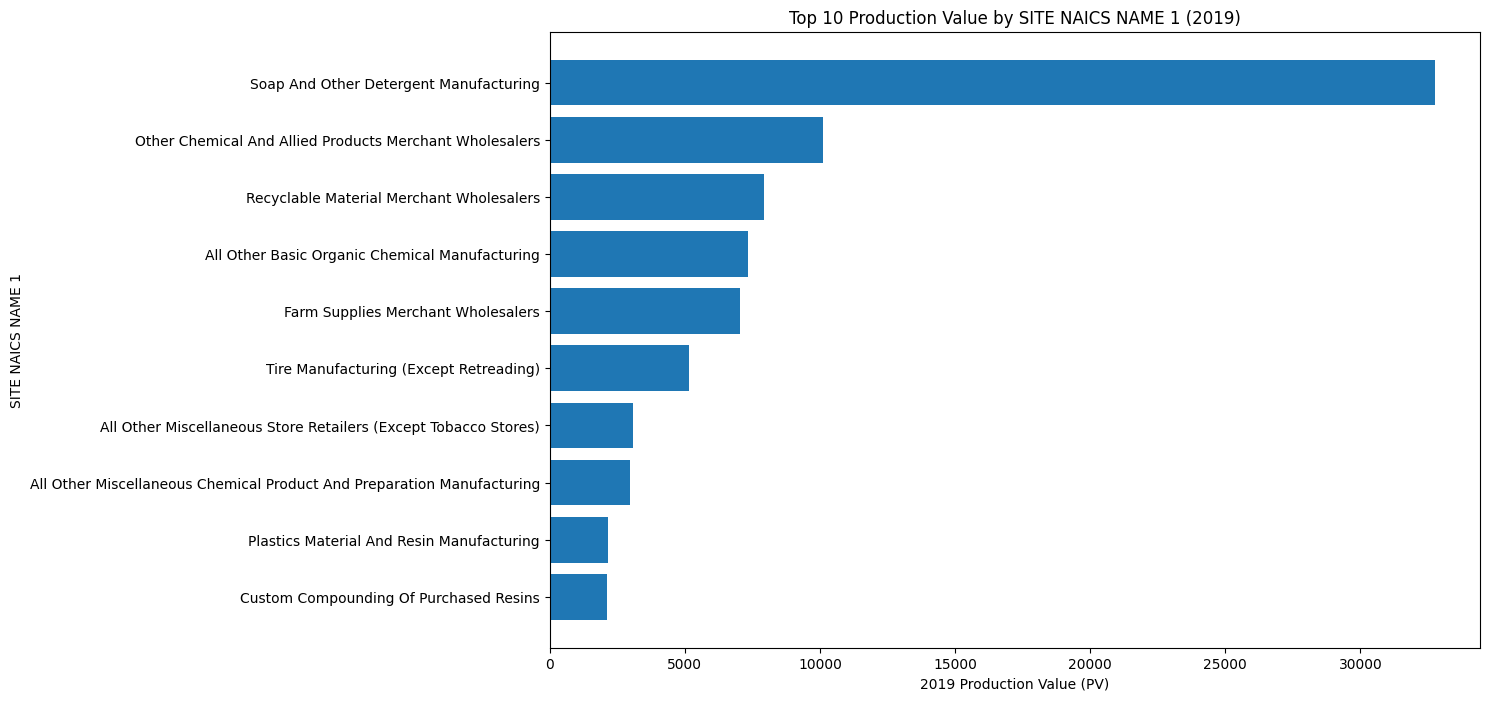

In [85]:
# prompt: I want horizontal bar chart contain top 10 of production value based on SITE NAICS CODE 1, x axis is 2019 PV

import matplotlib.pyplot as plt
# Group by 'SITE NAICS CODE 1' and sum '2019 PV'
df_naics_pv = df_consumer.groupby('SITE NAICS NAME 1')['2019 PV'].sum().reset_index()

# Sort by '2019 PV' and get the top 10
df_top_10_naics = df_naics_pv.nlargest(10, '2019 PV')

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(df_top_10_naics['SITE NAICS NAME 1'], df_top_10_naics['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('SITE NAICS NAME 1')
plt.title('Top 10 Production Value by SITE NAICS NAME 1 (2019)')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top
plt.show()

### TOP 10 Sector yang tidak melakukan daur ulang terhadap bahan kimia yang dipakainya

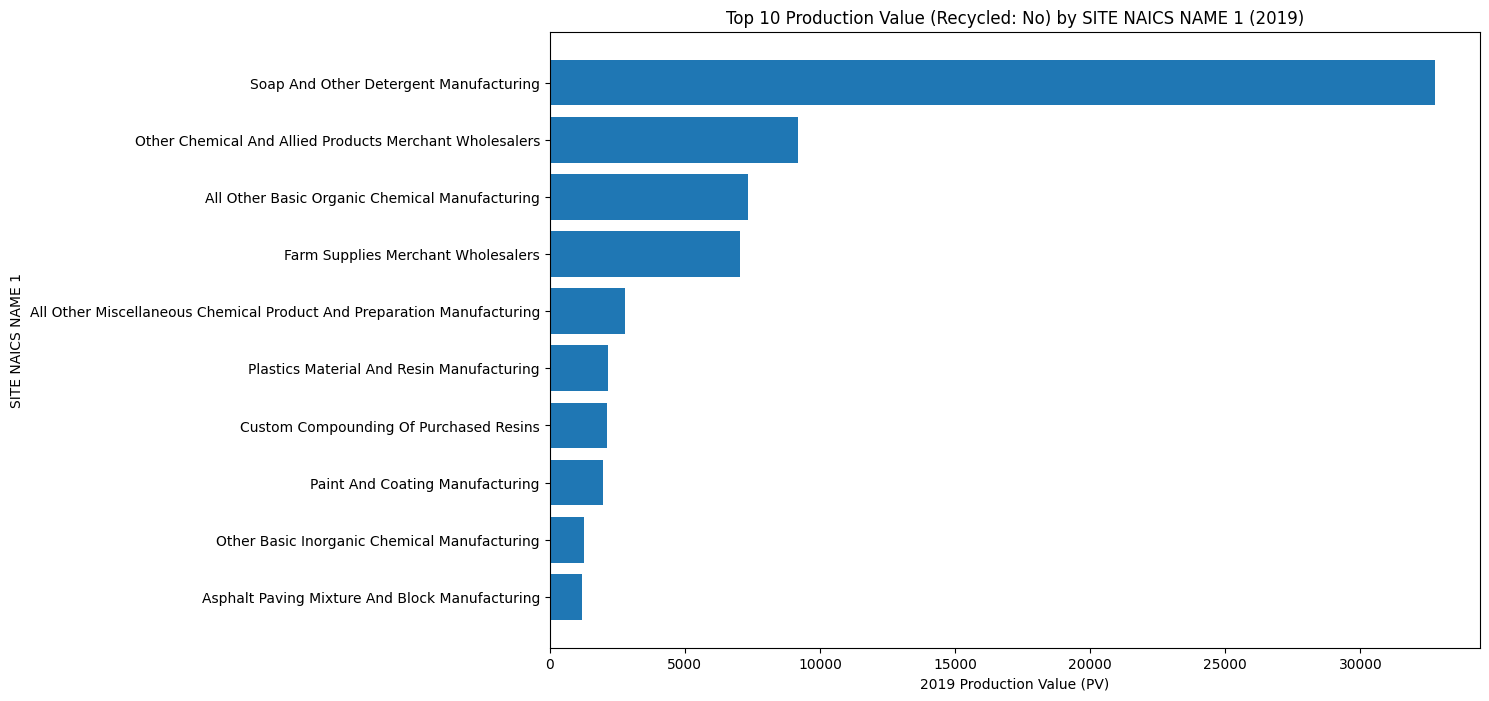

In [87]:
# prompt: I want horizontal bar chart contain top 10 of production value based on SITE NAICS CODE 1 where recycled value is no, x axis is 2019 PV

import matplotlib.pyplot as plt
# Filter for rows where 'RECYCLED' is 'No'
df_recycled_no = df_consumer[df_consumer['RECYCLED'] == 'No'].copy()

# Group by 'SITE NAICS CODE 1' and sum '2019 PV' for the filtered data
df_naics_pv_recycled_no = df_recycled_no.groupby('SITE NAICS NAME 1')['2019 PV'].sum().reset_index()

# Sort by '2019 PV' and get the top 10
df_top_10_naics_recycled_no = df_naics_pv_recycled_no.nlargest(10, '2019 PV')

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(df_top_10_naics_recycled_no['SITE NAICS NAME 1'], df_top_10_naics_recycled_no['2019 PV'])
plt.xlabel('2019 Production Value (PV)')
plt.ylabel('SITE NAICS NAME 1')
plt.title('Top 10 Production Value (Recycled: No) by SITE NAICS NAME 1 (2019)')
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top
plt.show()